In [2]:
import tensorflow as tf
from tensorflow import keras
from threading import Thread
import time
import numpy as np
import cv2 as cv
import pandas as pd
import playsound
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance
from tensorflow.python.keras.utils.vis_utils import plot_model
from statistics import mean
import datetime as dt
import statistics as stat

In [2]:
def right_eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

In [3]:
def left_eye_aspect_ratio(eye):
    A = distance.euclidean(eye[7], eye[11])
    B = distance.euclidean(eye[8], eye[10])  
    C = distance.euclidean(eye[6], eye[9])
    ear = (A + B) / (2.0 * C)
    return ear

In [4]:
def eye_aspect_ratio(eye):
    ear1 = right_eye_aspect_ratio(eye)
    ear2 = left_eye_aspect_ratio(eye)
    ear = (ear1 + ear2)/2.0
    return ear

In [5]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[22])
    B = distance.euclidean(mouth[15], mouth[21])
    C = distance.euclidean(mouth[16], mouth[20])
    D = distance.euclidean(mouth[12], mouth[18])
    mar = (A+B+C)/(2*D)
    return mar

In [6]:
def Alarm():
    path = '/home/ms/DESIGN_PROJECT/alarm.wav'
    playsound.playsound('/home/ms/DESIGN_PROJECT/alarm.wav')

In [7]:
def calculate_fps():
    new_time_frame = time.time()
    fps = 1/(new_time_frame-prev_frame_time)
    prev_frame_time = new_time_frame
    fps = int(fps)
    print(fps)

In [8]:
import numpy as np
#The Input membership functions
P_Low = 0
P_Medium = 0
P_High = 0

Danger = 0
Safe = 0
Notsafe = 0

A_Low = 0
A_Medium = 0
A_High = 0

#The Output membership functions
Normal = 0
Medium_Drowsy = 0 
Severe_Drowsy = 0

Inattentiveness = 0
state = 0

def Perclos(perclos):
    if perclos < 30:
        P_Low = 1
        P_Medium = 0
        P_High = 0
    elif perclos < 45:
        P_Low = (45 - perclos)/(45-30)
        P_Medium = (perclos - 30)/(45-30)
        P_High = 0
    elif perclos <60:
        P_Low = 0
        P_Medium = (60-perclos)/(60-45)
        P_High = (perclos-45)/(60-45)
    else:
        P_Low = 0
        P_Medium = 0
        P_High = 1        
    return P_Low, P_Medium, P_High

def Blink(blink):
    if blink < 5:
        Danger = 0
        Safe = 0
        Notsafe = 0
    elif blink < 10:
        Danger = (10-blink)/(10-5)
        Safe = (blink-5)/(10-5)
        Notsafe = 0
    elif blink < 15:
        Danger = 0
        Safe = (15-blink)/(15-10)
        Notsafe = (blink-10)/(15-10)
    else:
        Danger = 0
        Safe = 0
        Notsafe = 1
    return Danger, Safe, Notsafe

def Closure(closure):
    if closure < 2:
        C_Low = (4-closure)/(4-0)
        C_Medium = 0
        C_High = 0
    elif closure < 4:
        C_Low = (4-closure)/(4-0)
        C_Medium = (closure - 2)/(4-2)
        C_High = 0
    elif closure <6:
        C_Low = 0
        C_Medium = (6-closure)/(6-4)
        C_High = (closure-4)/(6-4)
    else:
        C_Low = 0
        C_Medium = 0
        C_High = 1        
    return C_Low, C_Medium, C_High

def AOT(aot):
    if aot < 2:
        A_Low = (4-aot)/(4-0)
        A_Medium = 0
        A_High = 0
    elif aot < 4:
        A_Low = (4-aot)/(4-0)
        A_Medium = (aot-2)/(4-2)
        A_High = 0
    elif aot < 6:
        A_Low = 0
        A_Medium = (6-aot)/(6-4)
        A_High = (aot-4)/(6-4)
    else:
        A_Low = 0
        A_Medium = 0
        A_High = 1
    return A_Low, A_Medium, A_High

def Fuzzifier(perclos, blink, aot, closure):
    P_Low, P_Medium, P_High = Perclos(perclos)
    Danger, Safe, Notsafe = Blink(blink)
    C_Low, C_Medium, C_High = Closure(closure)
    A_Low, A_Medium, A_High = AOT(aot)
    state = deFuzzifier(P_Low, P_Medium, P_High, Danger, Safe, Notsafe, A_Low, A_Medium, A_High, C_Low, C_Medium, C_High)
    return state

def deFuzzifier(P_Low, P_Medium, P_High, Danger, Safe, Notsafe, A_Low, A_Medium, A_High, C_Low, C_Medium, C_High):
    #The antecedents are evaluated using the OR fuzzy operator. The maximum of the three membership functions is chosen
    Normal = maximum(P_Low, Safe, A_Low, C_Low)
    Medium_Drowsy = maximum(P_Medium, Notsafe, A_Medium, C_Medium) 
    Severe_Drowsy = maximum(P_High, Danger, A_High, C_High)
    #Weighted Average Method
    Inattentiveness = ((-1*Normal) + (0*Medium_Drowsy) + (1*Severe_Drowsy))/(Normal + Medium_Drowsy + Severe_Drowsy)
    print(f"Normal State: {Normal} Medium Drowsy State: {Medium_Drowsy} Severe Drowsy State: {Severe_Drowsy}")
    print(f"Inattentiveness : {Inattentiveness}")
    return Inattentiveness

def maximum(num1, num2, num3, num4):
    return np.max([num1, num2, num3, num4])

<ipython-input-11-cca46323cf19>:91: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv.circle(frame, (i[0], i[1]), 1, (0,0,0), -1)


[0.9467206001281738, 0.11298489570617676, 0.12160873413085938, 0.5211327075958252, 0.28966379165649414, 0.11209273338317871, 0.24432635307312012, 0.29227757453918457, 0.40842366218566895, 0.130873441696167, 0.17006492614746094, 0.30264949798583984, 0.22070980072021484, 0.10857152938842773, 0.21939921379089355, 0.11676931381225586, 0.11587643623352051, 0.4558680057525635, 0.12495827674865723, 0.22289586067199707, 0.11446189880371094, 0.11103105545043945, 0.10945510864257812, 0.11047244071960449, 0.8827521800994873, 0.35980224609375, 0.12121796607971191, 0.3918571472167969, 0.11639404296875, 0.16608071327209473, 0.1742842197418213, 0.4076268672943115, 0.4442605972290039, 0.22428202629089355, 0.5677118301391602, 0.1685657501220703, 0.13592243194580078, 0.7908389568328857, 0.10987234115600586, 0.22492671012878418, 0.11786270141601562, 0.10927534103393555, 0.1106114387512207, 0.10730385780334473, 1.0960676670074463] 0.27801788647969566
[]
Normal State: 1.0 Medium Drowsy State: 0 Severe Drow

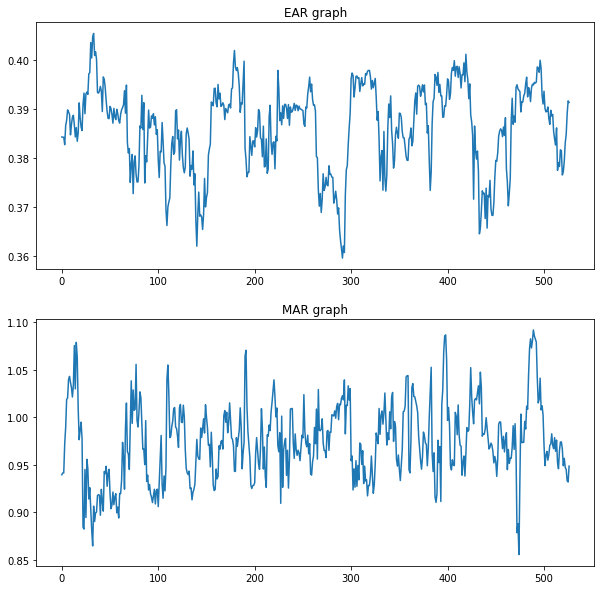

In [11]:
#Model Loading
model = keras.models.load_model('TRY_02.h5')

prev_frame_time = 0
next_frame_time = 0

capture = cv.VideoCapture("/home/ms/DESIGN_PART2/GD2/004/004_noglasses_mix.mp4")
#cv.VideoCapture("SUB-33/0.mp4")


#Threshold Values for State Detection
EAR_THRESHOLD = 0.30
MAR_THRESHOLD = 0.99

#Timing Measurements
Time_Mouth_Open = time.time()
Time_Eye_Open = time.time()
is_Eye_close = False
is_Mouth_open = False

SHOW_INFO = False
is_stop = False

#PERCLOS VALUE COMPUTATION VARIABLES
TOTAL_FRAMES_PERMIN = 0
TOTAL_CLOSEDEYES_PERMIN = 0
PERCLOS = 0

#Average eye opening time calculation
eot = 0
EOT = []

#Average mouth opening time calculation
Aot = 0
OT = []

#WEIGHT PARAMETERS
W_PERCLOS = 0
W_EYECLOSE = 0
W_BLINK = 0
W_YAWN = 0

COUNTER_FRAMES_EYE = 0
COUNTER_FRAMES_MOUTH = 0
COUNTER_BLINK = 0
COUNTER_YAWN = 0

a = True#To check if there is a frame coming 

#Lists records the Values of EAR, MAR, Time of Driver Detected as Drowsey
EAR_VALS = []
MAR_VALS = []
Drowsey_Detect_time = []

font = cv.FONT_HERSHEY_SIMPLEX

#Start time of the program
t_end = time.time()

while a:
    isTrue, frame = capture.read()
    if isTrue:
      TOTAL_FRAMES_PERMIN += 1 #Counts Number of Frames per minute
      frame = cv.resize(frame, (224, 224))
      frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
      frame = np.expand_dims(frame, axis = 0)
    
      Confidence_Score, bounding_box, Facial_Landmarks = model.predict(frame)
      
      frame = frame.reshape(224,224,3)
    #Facial landmark points of Eyes and Mouth
      FLP = Facial_Landmarks.reshape(32, 2)
        
    #Bounding Box Coordinates of the Face
      bounding_box = bounding_box.reshape(4, 1)
      bounding_box = bounding_box.astype(int)
      x1 = int(bounding_box[0])
      y1 = int(bounding_box[1])
      x2 = int(bounding_box[2])
      y2 = int(bounding_box[3])
    #########################################
      EAR = eye_aspect_ratio(FLP)
      MAR = mouth_aspect_ratio(FLP)
    ########################################
      EAR_VALS.append(EAR) 
      MAR_VALS.append(MAR) 
    ########################################
    #The Below code displays information on the frame if t is set to True
      if SHOW_INFO:
        for i in FLP:
            cv.circle(frame, (i[0], i[1]), 1, (0,0,0), -1)
        cv.rectangle(frame, (x1, y1), (x2, y2), (0,0,0), 1)
        cv.putText(frame, "EAR: {:.2f}".format(EAR), (10,10), font, 0.3, (0,0,255), 1,cv.LINE_4)
        cv.putText(frame, "MAR: {:.2f}".format(MAR), (10,20), font, 0.3, (0,0,255), 1,cv.LINE_4)
        cv.putText(frame, "Blinks: {}".format(COUNTER_BLINK), (10,30), font, 0.3, (0,0,255), 1,cv.LINE_4)
        cv.putText(frame, "AOT: {}".format(Aot), (10,40), font, 0.3, (0,0,255), 1,cv.LINE_4)
      
    #Drowsiness Indicators
      if EAR < EAR_THRESHOLD:
            is_Eye_close = True
            COUNTER_FRAMES_EYE += 1
            TOTAL_CLOSEDEYES_PERMIN += 1 #No of frames the driver has their eyes closed for the temporal window of one minute
            #If the EAR value is smaller than the Threshold for 2 seconds
        
      else:
        if COUNTER_FRAMES_EYE >= 2:
            COUNTER_BLINK += 1
            COUNTER_FRAMES_EYE = 0 
        if is_Eye_close:
            EDuration = time.time() - Time_Eye_Open
            EOT.append(EDuration)
            Time_Eye_Open = time.time()  
            is_Eye_close = False
        else:
            is_Eye_close = False #To assert that the variable is False
            Time_Eye_Open = time.time()
        
      if MAR > MAR_THRESHOLD:
            is_Mouth_open = True
      else:
        if is_Mouth_open:
            Duration = time.time() - Time_Mouth_Open
            OT.append(Duration)
            Time_Mouth_Open = time.time()  
            is_Mouth_open = False
        else:
            is_Mouth_open = False #To assert that the variable is False
            Time_Mouth_Open = time.time()
          
      #If temporal window size - One Minute Time is Passed 
      #Drowsiness State will be Evaluated Based on PERCLOS value, number of Blinks, Average eye closure duration and Average mouth opening duration.
    
      if (time.time() - t_end) >= 30:
        t_end = time.time()
        if OT:
            Aot = stat.mean(OT)
            print(OT, Aot)
            OT = []
            print(OT)
        else:
            Aot = 0
            OT = []
        
        if EOT:
            eot = stat.mean(EOT)
            print(EOT, eot)
            EOT = []
            print(EOT)
        else:
            eot = 0
            EOT = []
        
        PERCLOS = (TOTAL_CLOSEDEYES_PERMIN/TOTAL_FRAMES_PERMIN) * 100
        
        #Pass the Drowsiness Indicator values to the Fuzzy Inference System
        T = Fuzzifier(PERCLOS, COUNTER_BLINK, Aot, eot)
        
        print(PERCLOS, COUNTER_BLINK, Aot, eot, T)
        if T <= -0.4:
            cv.putText(frame, 'Awake', (x1,y1-10), font, 0.3, (0,255,255), 1,cv.LINE_4)
            is_stop = True
    
        elif T > -0.4 and T < 0.5:
            cv.putText(frame, 'Medium-Drowsy-State', (x1,y1-10), font, 0.3, (0,255,255), 1,cv.LINE_4)
            Drowsey_Detect_time.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
            is_stop = True
            
        elif T >= 0.5:
            cv.putText(frame, 'Severe-Drowsy-State', (x1,y1-10), font, 0.3, (0,255,255), 1,cv.LINE_4)
            Drowsey_Detect_time.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
            is_stop = True
            """
            t = Thread(target=Alarm)
            t.daemon = True
            t.start()
            """
        #Reset Conditions    
        TOTAL_FRAMES_PERMIN = 0
        TOTAL_CLOSEDEYES_PERMIN = 0
        COUNTER_BLINK = 0
        COUNTER_YAWN = 0  
        PERCLOS = 0
        Aot = 0
        #To update the values after passing the temporal window
        Time_Eye_Open = time.time() 
        Time_Mouth_Open = time.time()
        is_Mouth_open = False
        is_Eye_close = False
      key = cv.waitKey(1) & 0xFF
      if key == ord('q'):
         break
      if key == ord('i'):
         SHOW_INFO = not SHOW_INFO
         
      frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
      frame = cv.resize(frame, (400, 400))
      cv.imshow('Detected Face', frame)
      if is_stop:
        cv.waitKey(0)
        is_stop = False 
    a = isTrue

Stat = pd.DataFrame({"EAR" : EAR_VALS, "MAR":MAR_VALS})
drowsey = pd.DataFrame({'Drowsey State Detection Time' :  Drowsey_Detect_time})
Stat.to_csv("Driver_Stats.csv", index=False)
drowsey.to_csv("Driver_Drowsey.csv", index=False)

figure, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(EAR_VALS)
ax[0].set_title('EAR graph')
ax[1].plot(MAR_VALS)
ax[1].set_title('MAR graph')
plt.show()

capture.release()
cv.destroyAllWindows()

In [4]:
model = keras.models.load_model('TRY_01.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 32) 864         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 32) 128         conv2d_1[0][0]                   
______________________________________________________________________________________________